# 数据读取与简单探查

In [9]:
import os
if not os.path.exists("../data/all_stocks_5yr.csv"):
    !wget --no-check-certificate \
     https://pai-public-data.oss-cn-beijing.aliyuncs.com/public-dataset/all_stocks_5yr.csv -O ../data/all_stocks_5yr.csv

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [11]:
df = pd.read_csv('../data/all_stocks_5yr.csv')
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [12]:
df['Name'].nunique()
#df.info()

505

In [13]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [14]:
df.Name.nunique()

505

In [15]:
open_dates = np.unique(df.date)
len(open_dates)

1259

In [16]:
dates = df.date.apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
dates

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619040, dtype: datetime64[ns]

In [18]:
df = df.assign(day = dates) 
df

,date,open,high,low,close,volume,Name,day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013-02-08
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013-02-11
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013-02-12
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013-02-13
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013-02-14
...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018-02-01
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018-02-02
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018-02-05
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018-02-06


In [19]:
df.dtypes

date              object
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
day       datetime64[ns]
dtype: object

In [20]:
df.Name.value_counts().head(5)

AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
Name: Name, dtype: int64

In [21]:
# 筛选苹果这支股票
sub_df = df[df.Name == 'AAPL']

In [22]:
sub_df.head()

,date,open,high,low,close,volume,Name,day
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,2013-02-08
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,2013-02-11
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,2013-02-12
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,2013-02-13
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,2013-02-14


<AxesSubplot:xlabel='day'>

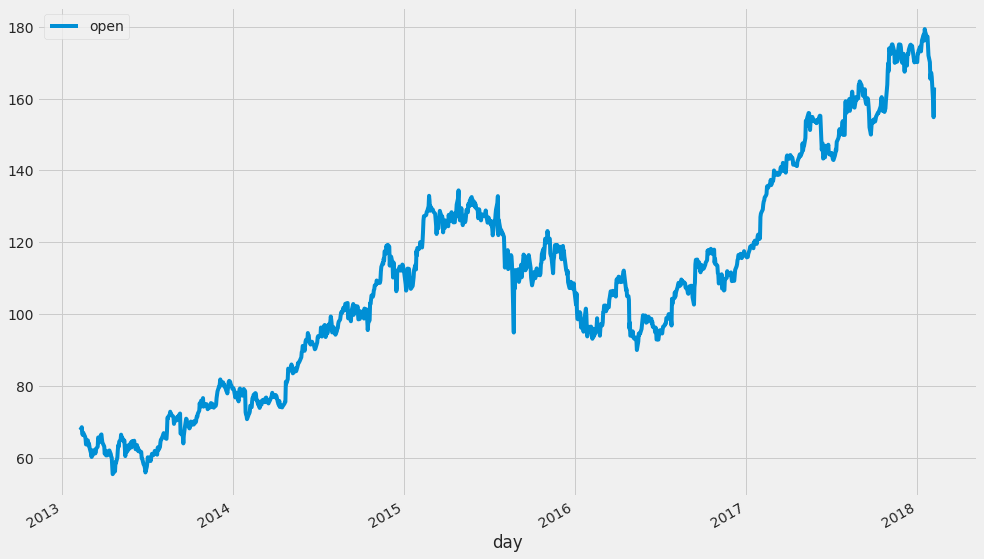

In [23]:
sub_df.plot.line(x = 'day', y= 'open', figsize=(15,10))

In [24]:
# 计算投资组合价值
def get_portfolio_value(port, evaluation_date):
    if evaluation_date not in open_dates: 
        print('Market closed for today')    
        return 0
    # 总价值
    total_value = 0
    # 累加每支股票的value
    for stock in port.keys():
        if stock == 'cash':
            total_value += port['cash']
            continue
        # 找到evaluation_date时，该股票的price
        stock_price = df[(df.Name == stock) & (df.date == evaluation_date)].iloc[0]['close']
        # 计算该股票的value
        position = stock_price * port[stock]
        total_value += position
    
    # 打印当前的portfolio
#     print(port)
    return total_value

In [25]:
"""
    port: 之前买过的股票
    purchase_day: 购买日期
    stock_name: 购买的股票
    num: 购买数量
"""
def portfolio_buy(port, purchase_day, stock_name, num):
    # 如果不开市
    if purchase_day not in open_dates: 
        print('Market closed for today')        
        return port
    # 计算股票需要购买的金额
    stock_price = df[(df.Name == stock_name) & (df.date == purchase_day)].iloc[0]['open']
    order_price = stock_price * num
    # 考虑portfolio 钱不够的问题
    if port['cash'] < order_price:
        # 没买成，原封不动
        return port
    
    # 购买成功，cash减少
    port['cash'] -=  order_price
    # 如果之前没有持有过这个股票
    if stock_name not in port.keys():
        port[stock_name] = num
        return port
    elif stock_name in port.keys():
        port[stock_name] += num
        return port
    else:
        print('Error')
        return port

In [26]:
"""
    port: 自己手上的股票情况
    sell_day: 卖出日期
    stock_name: 股票名称
    num: 卖出数量
"""
def portfolio_sell(port, sell_day, stock_name, num):
    # 如果不开市
    if sell_day not in open_dates: 
        print('Market closed for today')
        return port    
    
    # 计算卖出的股票金额
    stock_price = df[(df.Name == stock_name) & (df.date == sell_day)].iloc[0]['close']
    order_price = stock_price * num    
    # 如果之前没有持有过这个股票
    if stock_name not in port.keys():
        # 没卖成，原封不动
        return port
    # 如果卖出的数量 > 手上持有的数量，没卖成
    if num > port[stock_name]:
        return port    
    # 卖成功了，减少股票数量，增加cash
    if stock_name in port.keys():
        port[stock_name] -= num
        port['cash'] += order_price
        return port

In [27]:
# 假设初始资金 10000
portfolio = dict()
portfolio['cash'] = 10000

In [28]:
portfolio

{'cash': 10000}

In [29]:
# 买入两支股票
portfolio_buy(portfolio, '2016-01-04', 'AAPL', 10)
portfolio_buy(portfolio, '2016-01-04', 'GOOG', 10)

{'cash': 1543.8999999999996, 'AAPL': 10, 'GOOG': 10}

In [30]:
get_portfolio_value(portfolio, '2016-01-04')

10015.8

In [31]:
portfolio_sell(portfolio, '2017-02-01', 'AAPL', 20)

{'cash': 1543.8999999999996, 'AAPL': 10, 'GOOG': 10}

In [32]:
get_portfolio_value(portfolio, '2017-02-01')

10788.35

# 策略模拟

假设我们模拟 2017-01-03 开始，初始资金 100000 元，大家各自选择购买策略, 比 2017年 最后一个交易日： 2017-12-29 的portfolio 价值。

## 策略一： 2016-2017年，按照过去1年涨幅排序，直接全仓购买最好的


In [24]:
# 筛选2016-2017年的股票数据
year_2016_df = df[
    (df.day >= pd.to_datetime('2016-01-01', format='%Y-%m-%d', errors='ignore')) &
    (df.day <= pd.to_datetime('2017-01-01', format='%Y-%m-%d', errors='ignore')) 
]
year_2016_df

,date,open,high,low,close,volume,Name,day
730,2016-01-04,41.2900,41.3501,40.30,40.91,12037151,AAL,2016-01-04
731,2016-01-05,41.1800,41.4900,39.95,40.52,10514164,AAL,2016-01-05
732,2016-01-06,40.0500,41.7000,40.00,41.23,12393780,AAL,2016-01-06
733,2016-01-07,40.9700,41.5200,39.68,40.45,11312876,AAL,2016-01-07
734,2016-01-08,40.9400,41.3600,40.26,40.37,8853096,AAL,2016-01-08
...,...,...,...,...,...,...,...,...
618758,2016-12-23,53.2000,53.7800,53.18,53.78,1942469,ZTS,2016-12-23
618759,2016-12-27,53.7800,54.1500,53.65,53.72,1344976,ZTS,2016-12-27
618760,2016-12-28,53.7600,53.8500,53.35,53.44,1241854,ZTS,2016-12-28
618761,2016-12-29,53.4747,53.7790,53.40,53.62,1047017,ZTS,2016-12-29


In [25]:
best_stock = 'Not sure yet'
growth = -1

for stock in list(year_2016_df.Name.unique()):
    # 计算每支股票的涨幅 stock_growth
    sub_df = year_2016_df[year_2016_df.Name == stock]
    open_price = sub_df[sub_df.day == min(sub_df.day)].iloc[0]['open']
    close_price = sub_df[sub_df.day == max(sub_df.day)].iloc[0]['open']    
    stock_growth = round(100 * (close_price - open_price) / open_price, 3)
    # print(stock, ':',  stock_growth)
    # 找到涨幅最高的股票
    if stock_growth > growth:
        best_stock = stock
        growth = stock_growth
# AMD 涨幅达到322.383%
print(best_stock, ':', growth)

AMD : 322.383


In [26]:
# 假设初始资金 10000
portfolio = dict()
portfolio['cash'] = 10000

In [27]:
# 计算能买多少股
valid_num = int(portfolio['cash'] / df[(df.Name == 'AMD') & (df.date == '2017-01-03')].iloc[0]['open'])
valid_num

875

In [28]:
# 在2017年初 重仓AMD
portfolio_buy(portfolio, '2017-01-03', 'AMD', valid_num)

{'cash': 7.5, 'AMD': 875}

In [29]:
# 计算2017年底 投资组合value
get_portfolio_value(portfolio, '2017-12-29')

9002.5

In [30]:
# 统计2017年的交易日
trade_days_2017 = sorted(np.unique(df[
    (df.day >= pd.to_datetime('2017-01-01', format='%Y-%m-%d', errors='ignore')) &
    (df.day < pd.to_datetime('2018-01-01', format='%Y-%m-%d', errors='ignore'))     
]['date']))
print(trade_days_2017)

['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13', '2017

In [31]:
# 计算在2017年不同交易日的value
value = []
for trading_date in trade_days_2017:
    value.append(get_portfolio_value(portfolio, trading_date))

In [32]:
port_value_line = pd.DataFrame({'d': trade_days_2017, 'value':value})

<AxesSubplot:xlabel='d'>

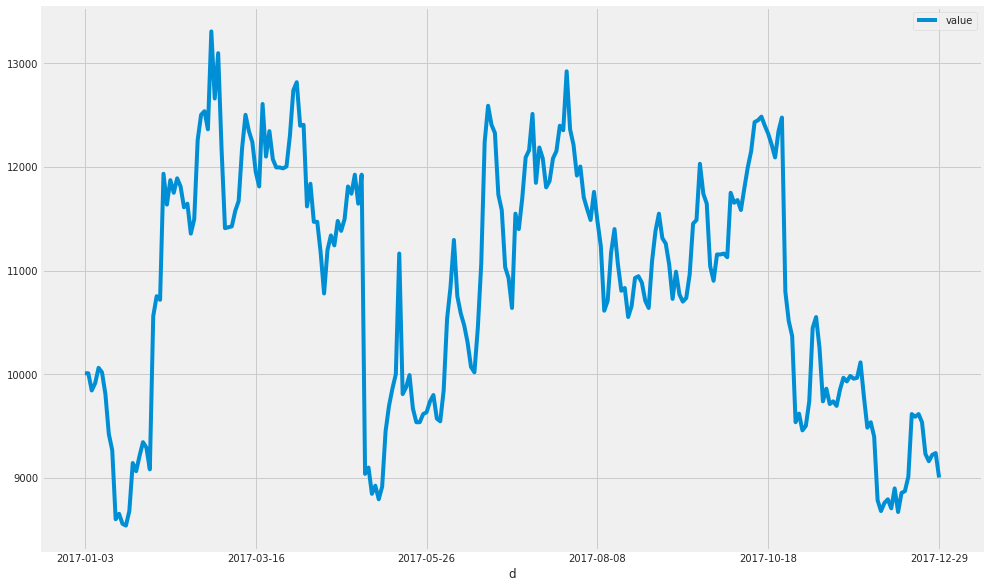

In [33]:
# 在2017年 不同交易日的value变化
port_value_line.plot.line(x = 'd', y= 'value', figsize=(15,10))